<a href="https://colab.research.google.com/github/Moin199/Moin199.github.io/blob/master/Keras_image_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
x_train.shape

(50000, 32, 32, 3)

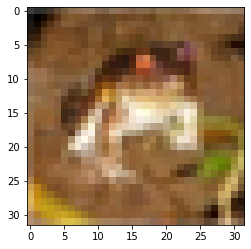

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.max()

255

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()

#model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape(32, 32, 3), activation='relu',))
#model.add(MaxPool2D(pool_size=(2,2)))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=20,callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.4866 - accuracy: 0.4640 - val_loss: 1.2891 - val_accuracy: 0.5334
Epoch 2/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.1588 - accuracy: 0.5922 - val_loss: 1.1912 - val_accuracy: 0.5857
Epoch 3/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0135 - accuracy: 0.6461 - val_loss: 1.0343 - val_accuracy: 0.6379
Epoch 4/20
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.9169 - accuracy: 0.6803 - val_loss: 0.9664 - val_accuracy: 0.6609
Epoch 5/20
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8320 - accuracy: 0.7123 - val_loss: 0.9354 - val_accuracy: 0.6806
Epoch 6/20
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.7556 - accuracy: 0.7368 - val_loss: 0.9840 - val_accuracy: 0.6594
Epoch 7/20
50000/50000 [==============================] 

In [ ]:
metrics=pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.486614,0.46404,1.289079,0.5334
1,1.158812,0.59218,1.191167,0.5857
2,1.013503,0.64612,1.034274,0.6379
3,0.916902,0.68030,0.966352,0.6609
4,0.831972,0.71228,0.935443,0.6806
5,0.755578,0.73678,0.983961,0.6594
6,0.689110,0.75926,0.982170,0.6786
7,0.618915,0.78376,0.956630,0.6855


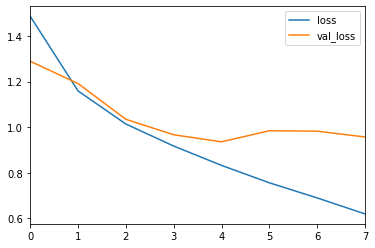

In [ ]:
metrics[['loss','val_loss']].plot()

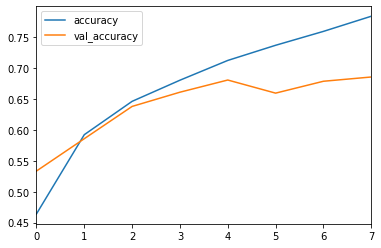

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions=model.predict_classes(x_test)

In [ ]:
predictions.shape

(10000,)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.84      0.77      0.80      1000
           2       0.63      0.51      0.56      1000
           3       0.55      0.48      0.51      1000
           4       0.63      0.66      0.64      1000
           5       0.63      0.52      0.57      1000
           6       0.66      0.82      0.73      1000
           7       0.73      0.74      0.73      1000
           8       0.80      0.78      0.79      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[787,  15,  22,  15,  22,   6,  18,  12,  71,  32],
       [ 43, 773,   3,   4,   6,   4,  12,   2,  28, 125],
       [105,   8, 507,  63,  92,  63,  96,  34,  16,  16],
       [ 33,  15,  66, 478,  94, 128, 104,  44,  17,  21],
       [ 27,   7,  62,  38, 655,  20,  87,  80,  17,   7],
       [ 28,   6,  70, 168,  56, 515,  62,  73,  10,  12],
       [ 13,   7,  36,  39,  40,  18, 823,   9,   8,   7],
       [ 32,   8,  28,  46,  55,  46,  21, 736,   3,  25],
       [104,  28,   9,  10,   9,   7,  13,   7, 775,  38],
       [ 44,  58,   5,  14,   6,  10,  15,  14,  28, 806]])

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
new_class=x_train[5]

In [ ]:
new_class.shape

(32, 32, 3)

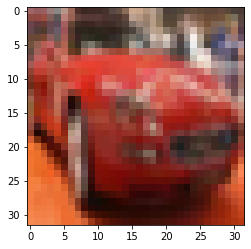

In [ ]:
plt.imshow(new_class)

In [ ]:
model.predict_classes(new_class.reshape(1,32,32,3))

array([1])

In [ ]:
y_train[5]

array([1], dtype=uint8)